# Random Forest Regressor

Importar librerías básicas

In [ ]:
import time
import datetime
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 

Obtener datos de Yahoo finance

In [ ]:
ticker='DIS'
period1 = int(time.mktime(datetime.datetime(2015, 1, 1, 0, 0).timetuple()))
period2 = int(time.mktime(datetime.datetime.now().timetuple()))
interval = '1d' # 1d, 1m
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
df_dis = pd.read_csv(query_string)

In [ ]:
df_dis['symbol']='DIS'
df_dis

,Date,Open,High,Low,Close,Adj Close,Volume,symbol
0,2015-01-02,94.910004,95.279999,92.849998,93.750000,87.376259,5865400,DIS
1,2015-01-05,93.279999,93.349998,91.779999,92.379997,86.099388,7789400,DIS
2,2015-01-06,92.570000,93.190002,91.160004,91.889999,85.642715,6793100,DIS
3,2015-01-07,92.720001,93.150002,92.099998,92.830002,86.518799,6589500,DIS
4,2015-01-08,93.870003,94.300003,93.559998,93.790001,87.413536,7579400,DIS
...,...,...,...,...,...,...,...,...
1775,2022-01-20,150.910004,152.660004,147.149994,147.619995,147.619995,11760400,DIS
1776,2022-01-21,141.229996,141.869995,136.630005,137.380005,137.380005,34457000,DIS
1777,2022-01-24,134.820007,137.679993,129.259995,137.460007,137.460007,31523800,DIS
1778,2022-01-25,135.289993,137.750000,132.380005,136.509995,136.509995,14680500,DIS


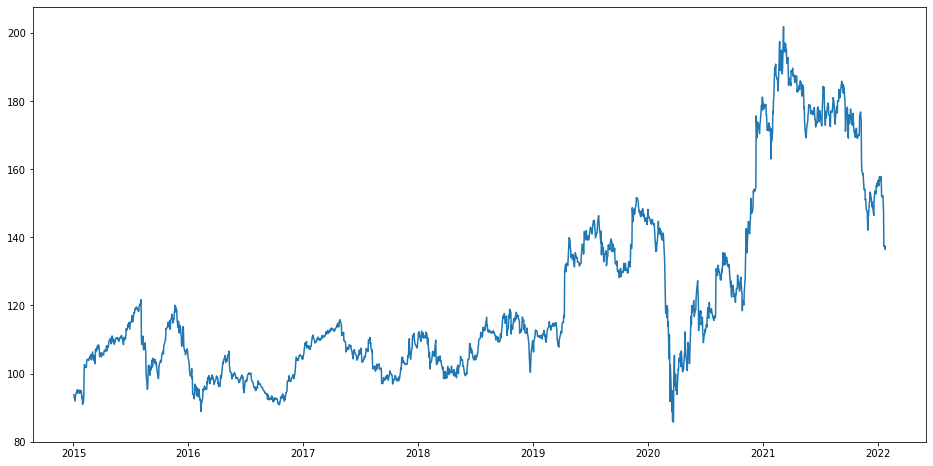

In [ ]:
#Establecer el índice como fecha
df_dis['Date'] = pd.to_datetime(df_dis.Date,format='%Y-%m-%d')
df_dis.index = df_dis['Date']

#Realizar plot
plt.figure(figsize=(16,8))
plt.plot(df_dis['Close'], label='Precio de Cierre Historico')

In [ ]:
#Guardar en un dataframe los datos de la columna Close
df=df_dis[['Close']]
df.tail(4)

,Close
Date,
2022-01-21,137.380005
2022-01-24,137.460007
2022-01-25,136.509995
2022-01-26,137.309998


Definir la variable predictora

In [ ]:
#Crear una variable para predecir 'x' días en el futuro
future_days=100
#Crear una nueva columna (objetivo) desplazada 'x' unidades/días hacia arriba
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
Date,,
2022-01-21,137.380005,NaN
2022-01-24,137.460007,NaN
2022-01-25,136.509995,NaN
2022-01-26,137.309998,NaN


In [ ]:
# Cree el conjunto de datos de características (x) y conviértalo en un numpy_array y elimine las últimas 'x' filas/días
X= np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 93.75    ]
 [ 92.379997]
 [ 91.889999]
 ...
 [181.300003]
 [183.479996]
 [181.860001]]


In [ ]:
#Cree el servidor de datos de destino (y) en una matriz numpy y obtenga todos los valores taret excepto las filas
y = np.array(df['Prediction'])[:-future_days]
print(y)

[110.529999 110.370003 110.959999 ... 137.460007 136.509995 137.309998]


Particionar los datos

In [ ]:
#Dividir los datos en 75 % de entrenamiento y 25 % de prueba
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

Entrenar el modelo

In [ ]:
#Importar el Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor   
  
#Crear un objeto del tipo Random Forest regressor 
RFReg = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
#Ajustar el Random Forest regressor con datos de entrenamiento representados por x_train y y_train
RFReg.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
#Obtener las últimas filas 'x' del conjunto de datos futuros
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [ ]:
#Altura prevista del dataset de testeo
random_forest_regressor = RFReg.predict((x_future))
print(random_forest_regressor)

[182.28610067 179.90019879 184.36749542 184.19140205 181.04699741
 178.49950254 181.04699741 181.81080121 175.21639656 180.79920071
 165.22395034 180.06570035 180.56379909 177.79849999 175.13699653
 171.81189695 164.38330142 173.60969565 175.21639656 172.85429722
 157.22519632 151.364201   174.54446378 176.29430308 176.29430308
 176.09070337 173.90840456 173.34810485 173.82910178 174.0446054
 169.63140031 169.92051322 171.89980285 166.44819618 165.35239874
 174.59980544 154.48009657 165.40310069 174.33180469 166.34710605
 166.42589881 168.22649909 164.19040014 162.86970137 162.76900471
 163.51000431 173.97160311 174.28459766 166.14330744 160.43690406
 158.08799485 151.364201   166.42589881 164.09480036 161.71950004
 160.16100146 152.56059758 174.54446378 154.58049946 154.58049946
 149.97449581 179.85569809 160.34461068 153.56355034 161.69419617
 158.71129743 153.69529878 153.82780005 157.68830487 159.4285047
 174.00170375 158.68659724 152.87499881 167.99791937 151.364201
 158.23810425 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


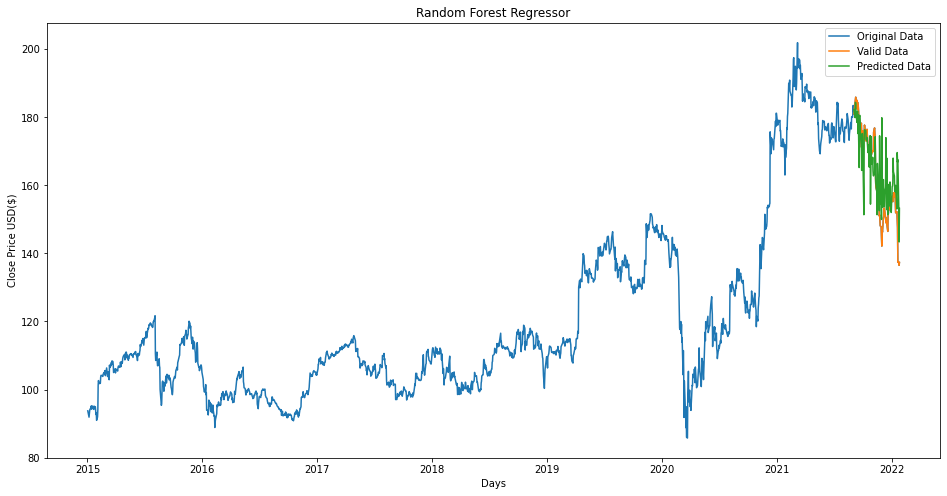

In [ ]:
# Visualizar la data
predictions = random_forest_regressor

valid = df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Random Forest Regressor')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original Data','Valid Data', 'Predicted Data'])
plt.show()